In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

#  How many rows and columns are in the dataset?

In [4]:
df.shape

(284807, 31)

# What are the column names and their data types?

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Are there any missing or null values in the dataset?

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# How many transactions are fraudulent, and how many are legitimate?


# Can we create a bar chart showing the count of fraudulent vs.
# legitimate transactions?

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

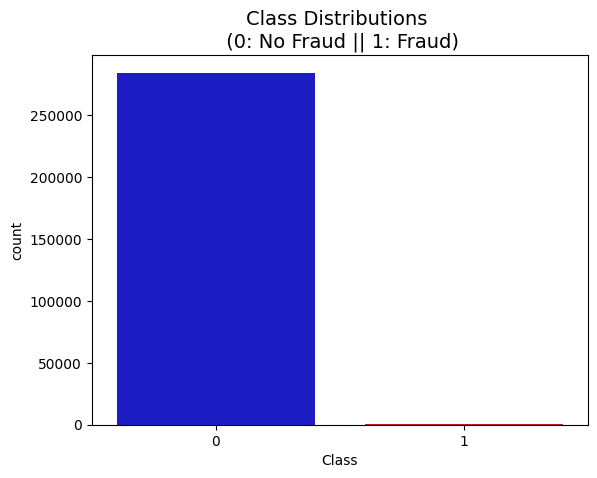

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)

plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
print(df['Class'].value_counts()[0],' are legitimate transactions')

284315  are legitimate transactions


# What percentage of transactions are fraudulent?

In [10]:
print('Frauds',df['Class'].value_counts()[1]/len(df) * 100)
print('Non Fraudulant',df['Class'].value_counts()[0]/len(df) * 100)

Frauds 0.1727485630620034
Non Fraudulant 99.82725143693798


# What are the minimum, maximum, mean, and median values for numerical columns like Amount?


In [11]:
print('median ',df['Amount'].median())
df['Amount'].describe()


median  22.0


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

# What is the maximum transaction amount in the dataset, and is it fraudulent?

In [12]:
 df['Amount'].max()

25691.16

In [13]:
max_transaction = df[df['Amount'] == 25691.16]

In [14]:
is_fraudulent = max_transaction['Class'].iloc[0]  #...
# Print the results
print(f"Maximum Transaction Amount: {25691.16}")
print(f"Is it fraudulent? {'Yes' if is_fraudulent == 1 else 'No'}")

Maximum Transaction Amount: 25691.16
Is it fraudulent? No


# What does the histogram of transaction amounts look like?

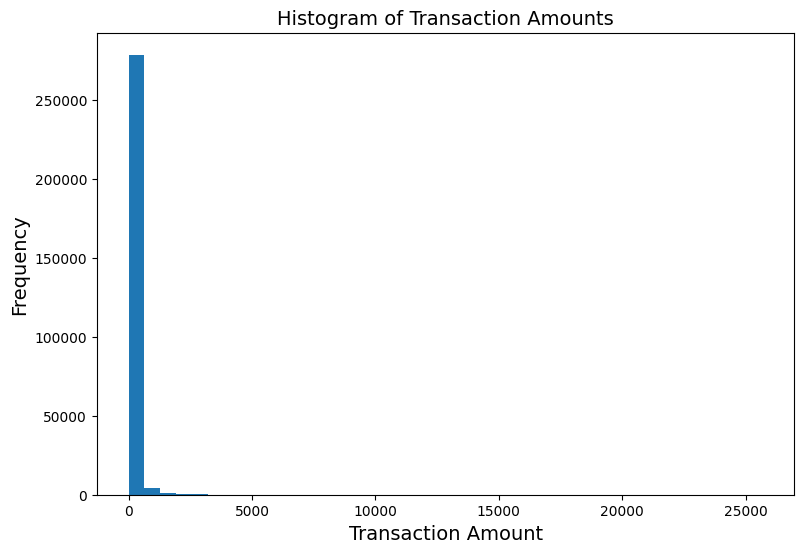

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.hist(df['Amount'], bins=40 )
plt.title('Histogram of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

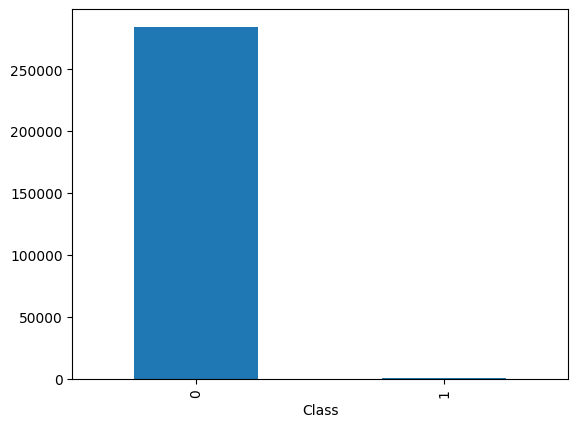

In [27]:
x=df['Class'].value_counts()
print(x)
df['Class'].value_counts().plot(kind='bar')

#  Can we use a heatmap to visualize the correlation between numerical features?

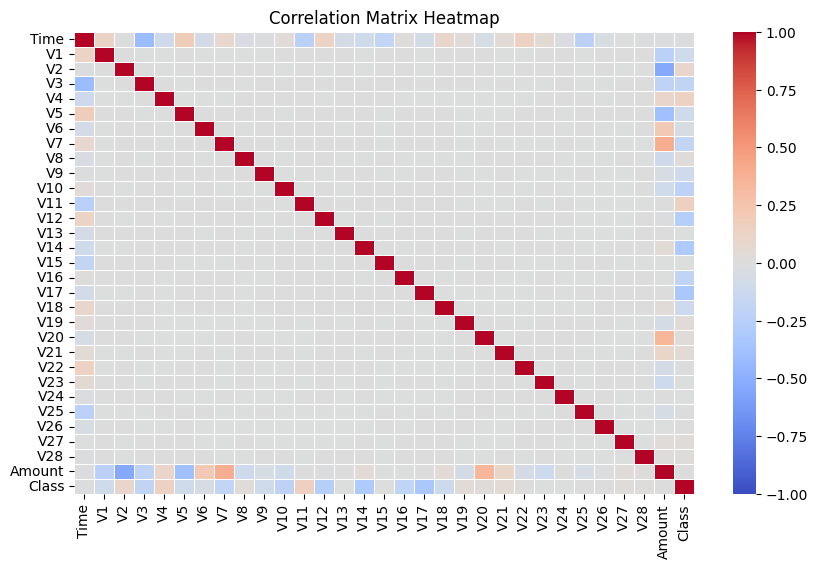

In [32]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()